In [1]:
from modules.data.temporal import *
from modules.data.mixed import *
from modules.utils.pso import *
import numpy as np
import torch 
import matplotlib.pyplot as plt

In [2]:
dataset = TemporalChunkedDataset("data/time_series/indrani_zeta_ca_no_zeroes.pickle")


torch.Size([2000, 2])
(1000, 2000, 2)


In [3]:
print(dataset[0])

rates, input, output = dataset[0]
print(input.size())
print(output.size())

(tensor([2.4733e-03, 4.1428e+00, 5.9924e+03, 4.9297e+00, 8.1268e-03],
       dtype=torch.float64), tensor([[0.1151, 0.2705],
        [0.1161, 0.2730],
        [0.1173, 0.2754],
        [0.1184, 0.2778]], dtype=torch.float64), tensor([[0.1161, 0.2730],
        [0.1173, 0.2754],
        [0.1184, 0.2778],
        [0.1194, 0.2802]], dtype=torch.float64))
torch.Size([4, 2])
torch.Size([4, 2])


In [4]:
full_seq_dataset = TemporalDataset("data/time_series/indrani_zeta_ca_no_zeroes.pickle", min_max_scale=True)


torch.Size([2000, 2])


torch.Size([1999, 2])
tensor([1234.6470,  994.0442], dtype=torch.float64)


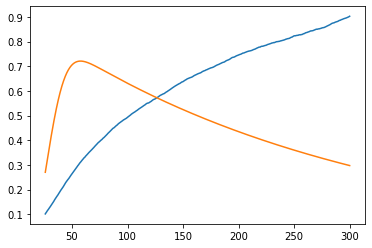

In [7]:
rates, input, output = full_seq_dataset[30]
print(input.size())
print(torch.sum(input, dim=0))
plt.plot(full_seq_dataset.times[:-1], input[:,:].numpy())

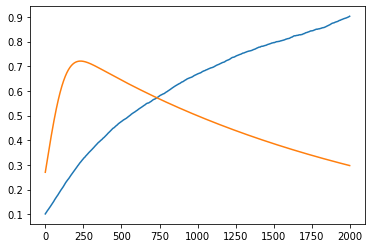

In [8]:
plt.plot(input.numpy())

In [ ]:
# find 4 time points
t = [10,250,750,1750]
# process

#### PSO

In [ ]:
 # pso for hard trained model
l3Dataset100k = ABMDataset("data/static/l3p_100k.csv", root_dir="data/", standardize=True, norm_out=True)
sgModel = tc.load("model/l3p_100k_large_batch_normed.pt")
wt = np.loadtxt("pso/gmm_weight/l3p_t3.txt")
# wt = np.identity(sgModel.output_size)
# # print(wt)
x = np.zeros(sgModel.input_size)
y = np.array([12.4509,  6.9795, 9.06247, 93.9796, 31.9489, 84.5102, 53.8117, 72.7715, 47.3049])


estimates = []
for i in range(10):   
    gcost, gbest = StewartPSO(sgModel, y, wt, n_steps=50, n_particles=500, dataset=l3Dataset100k, standardize=False, normalize_out=True, batch=True)
    estimates.append(gbest)

estimates = np.array(estimates)
print("Surrogate Estimates:")
print(estimates)
print("Means:",np.mean(estimates,axis=0))
print("Var:",np.var(estimates, axis=0))
# from BioNetGMMFit:
bngmm_est = "data/BNGMMFit/model_estimates.csv"
print("BioNetGMMFit Estimates 200 Particles, 40 steps:")
data = np.genfromtxt(bngmm_est, delimiter=",", skip_header=True)
np.set_printoptions(suppress=True)
print("Means:", np.mean(data, axis=0))
print("Var:", np.var(data, axis=0))